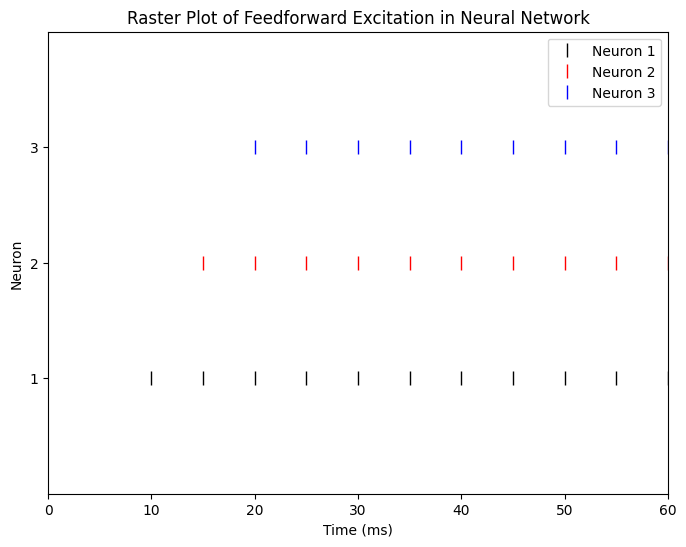

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define firing times for each neuron
# Neuron 1 fires at times: 0 ms, 10 ms, 20 ms, ...
neuron_1_firing = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])  
# Neuron 2 fires 5 ms after each neuron in Neuron 1
neuron_2_firing = neuron_1_firing + 5  
# Neuron 3 fires 5 ms after each neuron in Neuron 2
neuron_3_firing = neuron_2_firing + 5

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Plot the raster plot for each neuron
plt.plot(neuron_1_firing, np.ones_like(neuron_1_firing), 'k|', label="Neuron 1", markersize=10)
plt.plot(neuron_2_firing, np.ones_like(neuron_2_firing) * 2, 'r|', label="Neuron 2", markersize=10)
plt.plot(neuron_3_firing, np.ones_like(neuron_3_firing) * 3, 'b|', label="Neuron 3", markersize=10)

# Set plot limits
plt.xlim(0, 60)  # Time range from 0 to 60 ms
plt.ylim(0, 4)   # 3 neurons, so the y-axis goes from 0 to 4 (including the space between neurons)

# Set the y-ticks to only show whole numbers
plt.yticks([1, 2, 3])  # Only show 1, 2, and 3 on the y-axis

# Add labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Neuron")  # Changed "Layer" to "Neuron"
plt.title("Raster Plot of Feedforward Excitation in Neural Network")

# Show legend
plt.legend()

# Display the plot
plt.show()

A simple open-loop neural network processes inputs in a feedforward way without feedback or recurrent connectivity. It takes in inputs, then feeds them to a controller that makes instructions for operating an actuator in response to the input. The controller sends information to the actuator which takes action to reach a desired state. In short, the controller tells the actuator what to do, and the actuator carries out the action. A simple open-loop neural network produces rapid and accurate responses. However, a limitation is that it may not work for novel situations. A simple open loop neural network is different from an IF and LIF neuron because it uses continuous signals and has a fixed structure. An NN has an input layer, one or more hidden layers, and an output layer while IF and LIF models do not. Overall, open-loop feedforward neural networks are the most complex and have more opportunities for processing and would contain more bits to encode. The LIF model is more complex than the IF model because it is more biologically accurate and includes leak channels, so the LIF model would have more bits than the IF model.

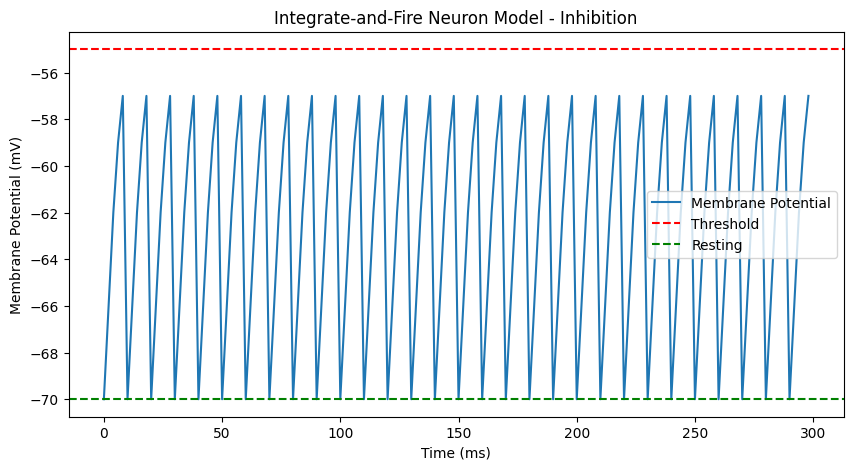

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 2  # Time step (ms)
T = 300   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
V_rest = -70  # Resting potential (mV)
V_th = -55    # Spiking threshold (mV)
V_reset = -70 # Reset potential (mV)
R = 10        # Membrane resistance (MΩ)
C = 1         # Membrane capacitance (µF)
tau = R * C   # Membrane time constant (ms)
I = 2.0       # Constant input current (nA)

# Initialize variables
V = np.full_like(time, V_rest)  # Membrane potential
spikes = []

# Simulate the IF neuron model
for i in range(1, len(time)):
    dV = (-(V[i-1] - V_rest) + R * I) / tau * dt  # Update rule
    V[i] = V[i-1] + dV
    
    if V[i] >= V_th:
        V[i] = V_reset  # Reset after spike
        spikes.append(time[i])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential")
plt.axhline(V_th, color='red', linestyle='--', label="Threshold")
plt.axhline(V_rest, color='green', linestyle='--', label="Resting")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Neuron Model - Inhibition")
plt.legend()
plt.show()


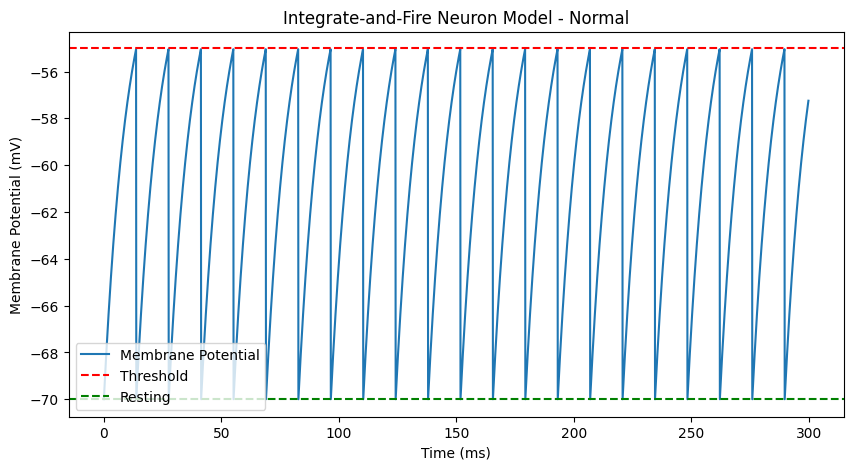

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 300   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
V_rest = -70  # Resting potential (mV)
V_th = -55    # Spiking threshold (mV)
V_reset = -70 # Reset potential (mV)
R = 10        # Membrane resistance (MΩ)
C = 1         # Membrane capacitance (µF)
tau = R * C   # Membrane time constant (ms)
I = 2.0       # Constant input current (nA)

# Initialize variables
V = np.full_like(time, V_rest)  # Membrane potential
spikes = []

# Simulate the IF neuron model
for i in range(1, len(time)):
    dV = (-(V[i-1] - V_rest) + R * I) / tau * dt  # Update rule
    V[i] = V[i-1] + dV
    
    if V[i] >= V_th:
        V[i] = V_reset  # Reset after spike
        spikes.append(time[i])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential")
plt.axhline(V_th, color='red', linestyle='--', label="Threshold")
plt.axhline(V_rest, color='green', linestyle='--', label="Resting")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Neuron Model - Normal")
plt.legend()
plt.show()

To change the inputs to show inhibition, the code was updated to include an inhibition input that prevented the spikes from reaching threshold. I made sure that the spikes would occur, but they would never reach -55 mV. Specifically in the code, I changed the time step (dt) from 0.1 to 2 ms. This resulted in spikes that were sub-threshold, which would mean that no action potential was fired. This was shown on a graph showing IF model firing.

Matplotlib is building the font cache; this may take a moment.


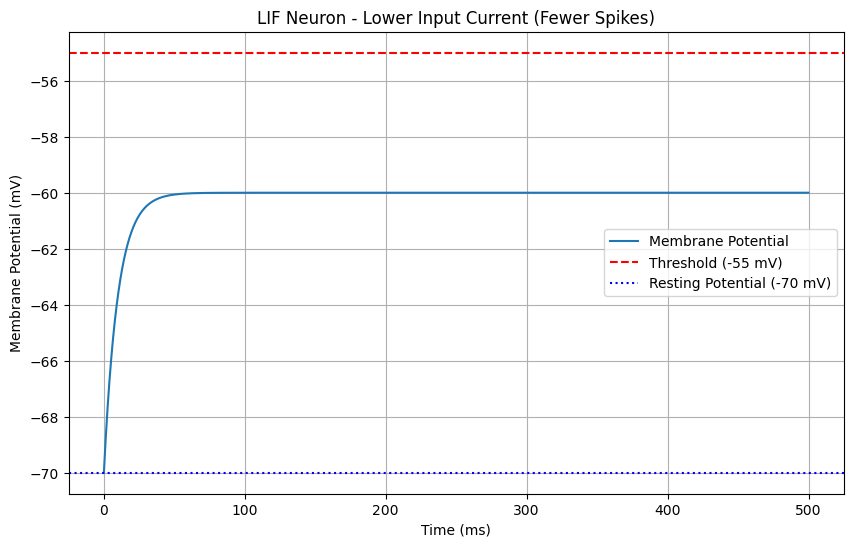

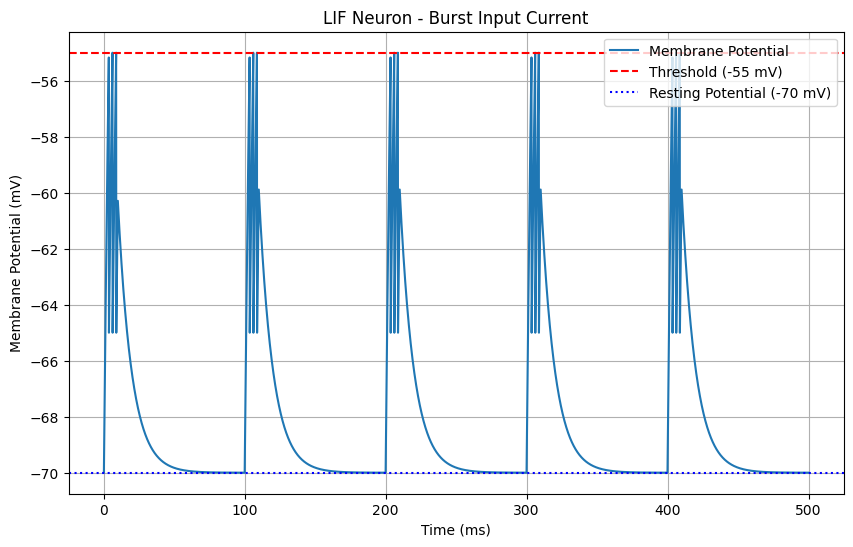

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# LIF model parameters
resting_potential = -70.0  # Resting potential in mV
threshold = -55.0  # Threshold potential in mV
reset_potential = -65.0  # Reset potential after a spike in mV
membrane_resistance = 10.0  # Membrane resistance in MOhm
membrane_time_constant = 10.0  # Membrane time constant in ms

def lif_model(input_current, dt=0.1, simulation_time=500):
    num_steps = int(simulation_time / dt)
    time = np.arange(0, simulation_time, dt)
    membrane_potential = np.full(num_steps, resting_potential)
    spikes = []

    for t in range(1, num_steps):
        dv = (
            (-membrane_potential[t-1] + resting_potential +
             membrane_resistance * input_current[t]) /
            membrane_time_constant
        ) * dt
        membrane_potential[t] = membrane_potential[t-1] + dv

        if membrane_potential[t] >= threshold:
            membrane_potential[t] = reset_potential
            spikes.append(t * dt)

    return time, membrane_potential, spikes

# Parameters
simulation_time = 500  # ms
dt = 0.1  # Time step in ms

def run_simulation_and_plot(input_current, title):
    time, membrane_potential, spikes = lif_model(input_current, dt, simulation_time)

    plt.figure(figsize=(10, 6))
    plt.plot(time, membrane_potential, label="Membrane Potential")
    plt.axhline(threshold, color="r", linestyle="--", label="Threshold (-55 mV)")
    plt.axhline(resting_potential, color="b", linestyle=":", label="Resting Potential (-70 mV)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Potential (mV)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Scenario 1: Lower Input Current (Fewer Spikes)
input_current_1 = np.full(int(simulation_time / dt), 1.0)  # Reduced constant input to generate fewer spikes
run_simulation_and_plot(input_current_1, "LIF Neuron - Lower Input Current (Fewer Spikes)")

# Scenario 2: Burst Input Current
burst_pattern = np.concatenate([np.full(int(10 / dt), 5.0), np.full(int(90 / dt), 0.0)])
input_current_2 = np.tile(burst_pattern, int(simulation_time / (100)))  # Adjust repetition to fit simulation time
run_simulation_and_plot(input_current_2, "LIF Neuron - Burst Input Current")

Utilizing the updated LIF model from the previous assignment, the first graph depicts a graph where the summation of all of the inputs do not reach the threshold at -55 mV. The code was manipulated from initially being 3.0 to 1.0 nA, which slows down the rate at which the membrane potential rises taking an extended amount of time to reach the threshold to trigger an action potential. Less spinking occurs because the inputs are integrated at a slower more gradual rate than in the original model. 

The second graph depicts sburst durations of 10 ms instead of 20 ms, which reduces the period of time that the neuron is able to recieve any excitatory inputs. Because of the shorter duration of time, there will be less spiking in each burst. The threshold is still met, however it occurs over a shorter period of time, so the bursts have a more distinct pattern than the original. 